## Attribute Information

* `id`: unique identifier

* `gender`: "Male", "Female" or "Other"

* `age`: age of the patient

* `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

* `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

* `ever_married`: "No" or "Yes"

* `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

* `Residence_type`: "Rural" or "Urban"

* `avg_glucose_level`: average glucose level in blood

* `bmi`: body mass index

* `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"

* `stroke`: 1 if the patient had a stroke or 0 if not



<div style = 'border: 3px solid #D9C10B;'>

## Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

## Reading the dataset: 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset . 


In [2]:
data_path = 'healthcare-dataset-stroke-data.csv'
original_df = pd.read_csv(data_path)
original_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
original_df.drop('id', axis=1, inplace=True)
original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
round (original_df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [6]:
round (original_df.describe(exclude = ['float', 'int64']))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### `bmi` column had null values, so was imputing them with the mean of the column

In [7]:
# # Create an instance of the Imputer class
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on the column with missing values
# imputer.fit(original_df[['bmi']])

# # Use the transform method to fill in missing values with the mean of the column
# original_df['bmi'] = imputer.transform(original_df[['bmi']])

# Removing entries in row of bmi = null  

In [8]:
original_df.dropna(inplace=True)

In [9]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


# Checking the unique values in each of the categorical columns

In [10]:
original_df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
Other_index = original_df[original_df['gender'].str.contains('Other')].index
original_df.drop(Other_index, inplace=True)
original_df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [12]:
original_df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [13]:
original_df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [14]:
original_df['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [15]:
original_df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [16]:
original_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [17]:
original_df = original_df.sort_index().reset_index(drop=True)
original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Visualization of original dataset & Categorizing the various variables based on WHO guidelines and research paper

In [18]:
def plot_hist(df, row, col, figsize=(10, 20)):
    fig, axs = plt.subplots(nrows=row, ncols=col, figsize=figsize)

    for i, column in enumerate(df.columns):
        row_num = i // col
        col_num = i % col
        ax = axs[row_num, col_num]
        ax.hist(df[column], bins=len(df[column].unique()))
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

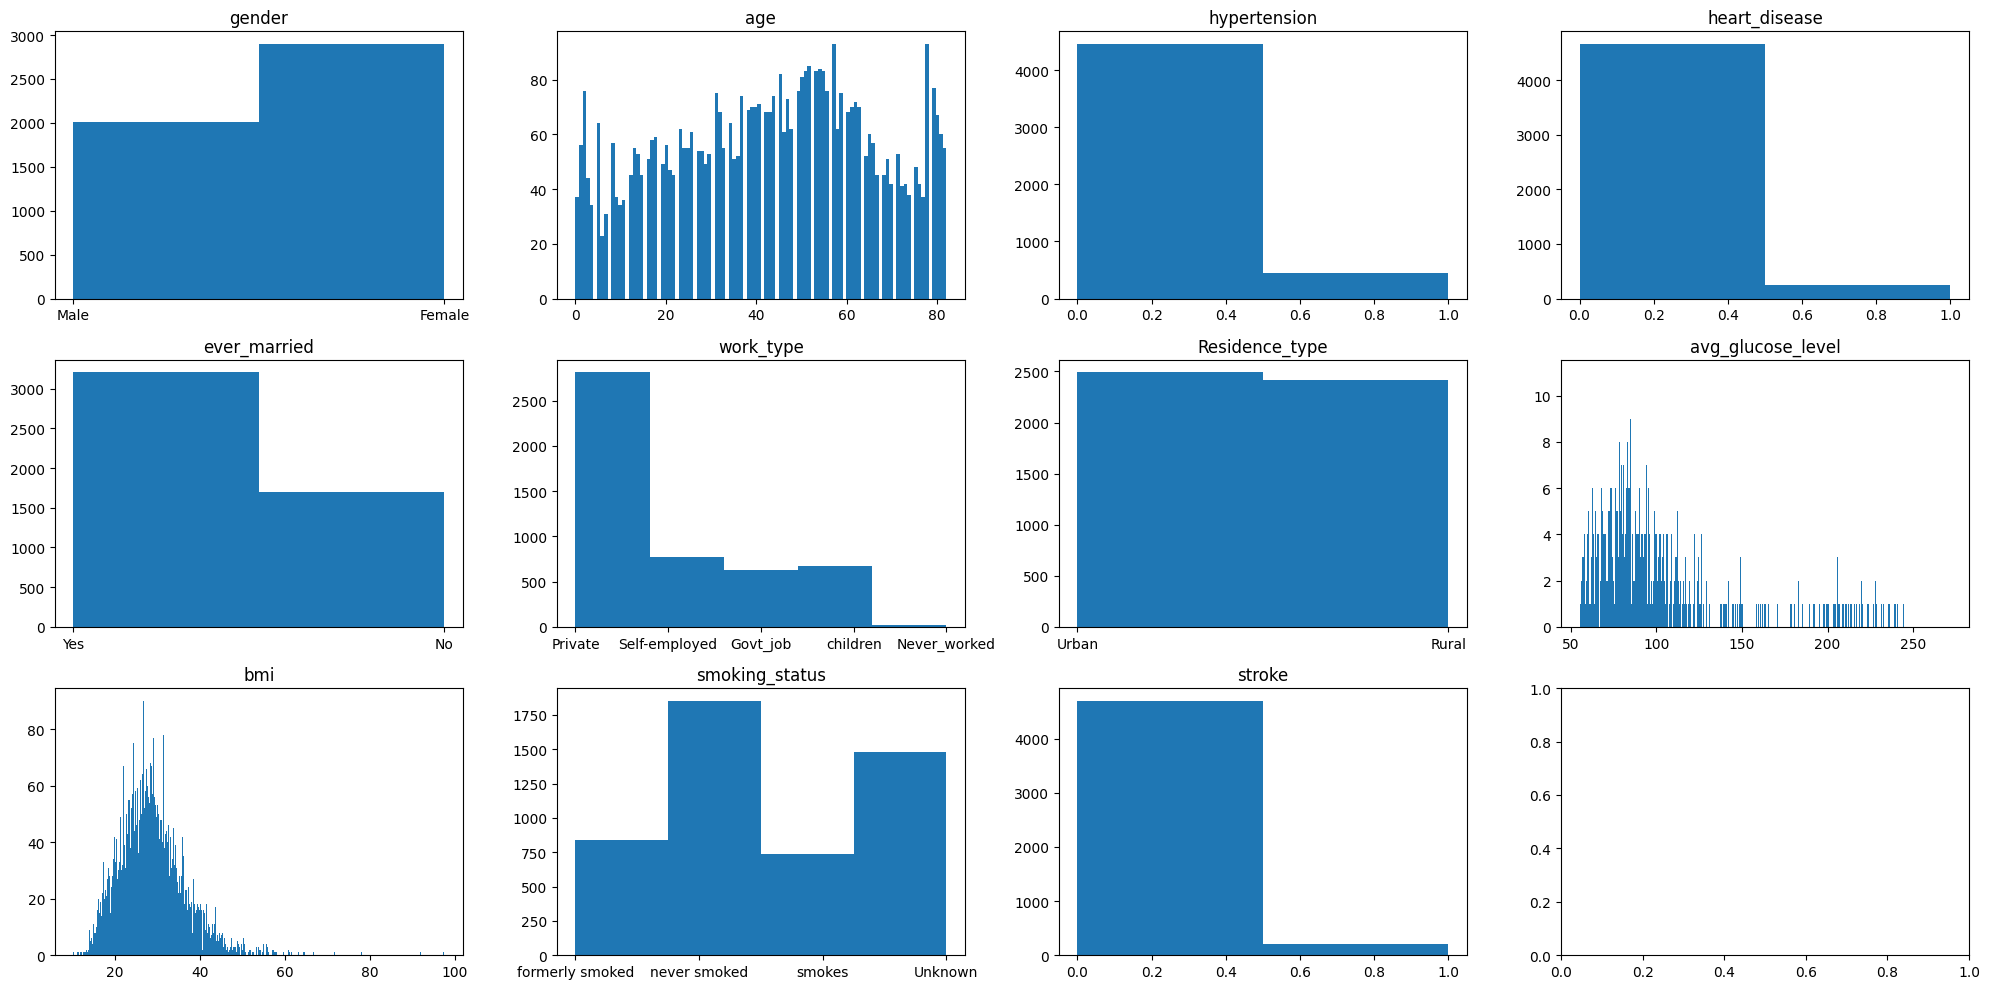

In [19]:
plot_hist(original_df, 3, 4, figsize = (20,10))

<div style = 'border: 3px solid #D9C10B;'>

Defining 4 classes: Underweight, Normal, Overweight, Obese

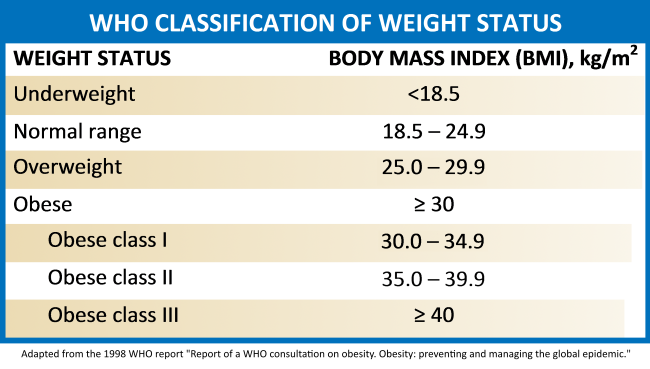

<div style = 'border: 1px solid #D9C10B;'>

CLASSIFICATION FOR AGE

Defining 3 classes:

Patients can be grouped into three age groups:
    
    below 50 years (153, 13.2%);
    
    50-75 years, (702, 60.5%) and
    
    above 75 years (306, 26.4%).

SOURCE : 

According to paper :

Wu CY, Wu HM, Lee JD, Weng HH. Stroke risk factors and subtypes in different age groups: a hospital-based study. Neurol India. 2010 Nov-Dec;58(6):863-8. doi: 10.4103/0028-3886.73747. PMID: 21150050.

<div style = 'border: 1px solid #D9C10B;'>

CLASSIFICATION FOR AVG. GLUCOSE LEVEL

Defining 4 classes:

The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). 

When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. 

If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed.

An individual with low fasting blood glucose concentration (hypoglycemia) – below 70 mg/dL (3.9 mmol/L) – will experience dizziness, sweating, palpitations, blurred vision and other symptoms that have to be monitored.


SOURCE : https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,and%20monitoring%20glycemia%20are%20recommended.

<div style = 'border: 1px solid #D9C10B;'>

TO HANDLE CLASS IMBALANCE

Using class weigths 

Not using any data augmentation techniques, as topic is related to health and there should only be original - real - life data

<div style = 'border: 3px solid #D9C10B;'>

In [20]:
original_df['gender'] = original_df['gender'].replace({'Female': 0, 'Male': 1})
original_df['Residence_type'] = original_df['Residence_type'].replace({'Rural': 0, 'Urban': 1})
original_df['ever_married'] = original_df['ever_married'].replace({'No': 0, 'Yes': 1})
original_df['smoking_status'] = original_df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2 ,'Unknown' : 3})
original_df['work_type'] = original_df['work_type'].replace({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})

# define the intervals
bins_bmi = [0, 18.5, 24.9, 29.9, 100]

# create a new column with the interval labels
original_df['bmi'] = pd.cut(original_df['bmi'], bins=bins_bmi, labels=[1, 2, 3, 4]).astype('int64')

# define the intervals
bins_age = [0, 50, 75, 100]

# create a new column with the interval labels
original_df['age'] = pd.cut(original_df['age'], bins=bins_age, labels=[1, 2, 3]).astype('int64')

# define the intervals
bins_avg_glse_lvl = [0, 70, 100, 125, 300]

# create a new column with the interval labels
original_df['avg_glucose_level'] = pd.cut(original_df['avg_glucose_level'], bins=bins_avg_glse_lvl, labels=[1, 2, 3, 4]).astype('int64')


original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,2,0,1,1,3,1,4,4,1,1
1,1,3,0,1,1,3,0,3,4,0,1
2,0,1,0,0,1,3,1,4,4,2,1
3,0,3,1,0,1,4,0,4,2,0,1
4,1,3,0,0,1,3,1,4,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,1,0,0,0,0,0,3,2,3,0
4904,0,3,0,0,1,4,1,4,4,0,0
4905,0,1,0,0,1,4,0,2,4,0,0
4906,1,2,0,0,1,3,0,4,3,1,0


In [21]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             4908 non-null   int64
 1   age                4908 non-null   int64
 2   hypertension       4908 non-null   int64
 3   heart_disease      4908 non-null   int64
 4   ever_married       4908 non-null   int64
 5   work_type          4908 non-null   int64
 6   Residence_type     4908 non-null   int64
 7   avg_glucose_level  4908 non-null   int64
 8   bmi                4908 non-null   int64
 9   smoking_status     4908 non-null   int64
 10  stroke             4908 non-null   int64
dtypes: int64(11)
memory usage: 421.9 KB


# Storing each of the categorical columns for One-Hot encoding

In [22]:
# df = original_df.copy()
# cat_df_1 = original_df[['work_type']]
# cat_df_2 = original_df[['smoking_status']]
# cat_df_1.sort_index().reset_index(drop=True)
# cat_df_2.sort_index().reset_index(drop=True)


# df.drop(['work_type', 'smoking_status'], axis=1, inplace=True)

# Applying One-Hot encoding on each of the categorical columns & Concatenating with remaining ones

In [23]:
# # Create an instance of the encoder
# encoder1 = OneHotEncoder()
# encoder2 = OneHotEncoder()
# dumm_df_1 = pd.DataFrame(encoder1.fit_transform(cat_df_1).toarray(),columns = encoder1.get_feature_names_out(cat_df_1.columns)).astype('int64')
# dumm_df_2 = pd.DataFrame(encoder2.fit_transform(cat_df_2).toarray(),columns = encoder2.get_feature_names_out(cat_df_2.columns)).astype('int64')

# X = pd.concat([df,dumm_df_1,dumm_df_2],axis = 1)
# last_col = X.pop('stroke')  
# X.insert(len(X.columns), 'stroke', last_col)
# X

# Correlations & data visualization after categorizing

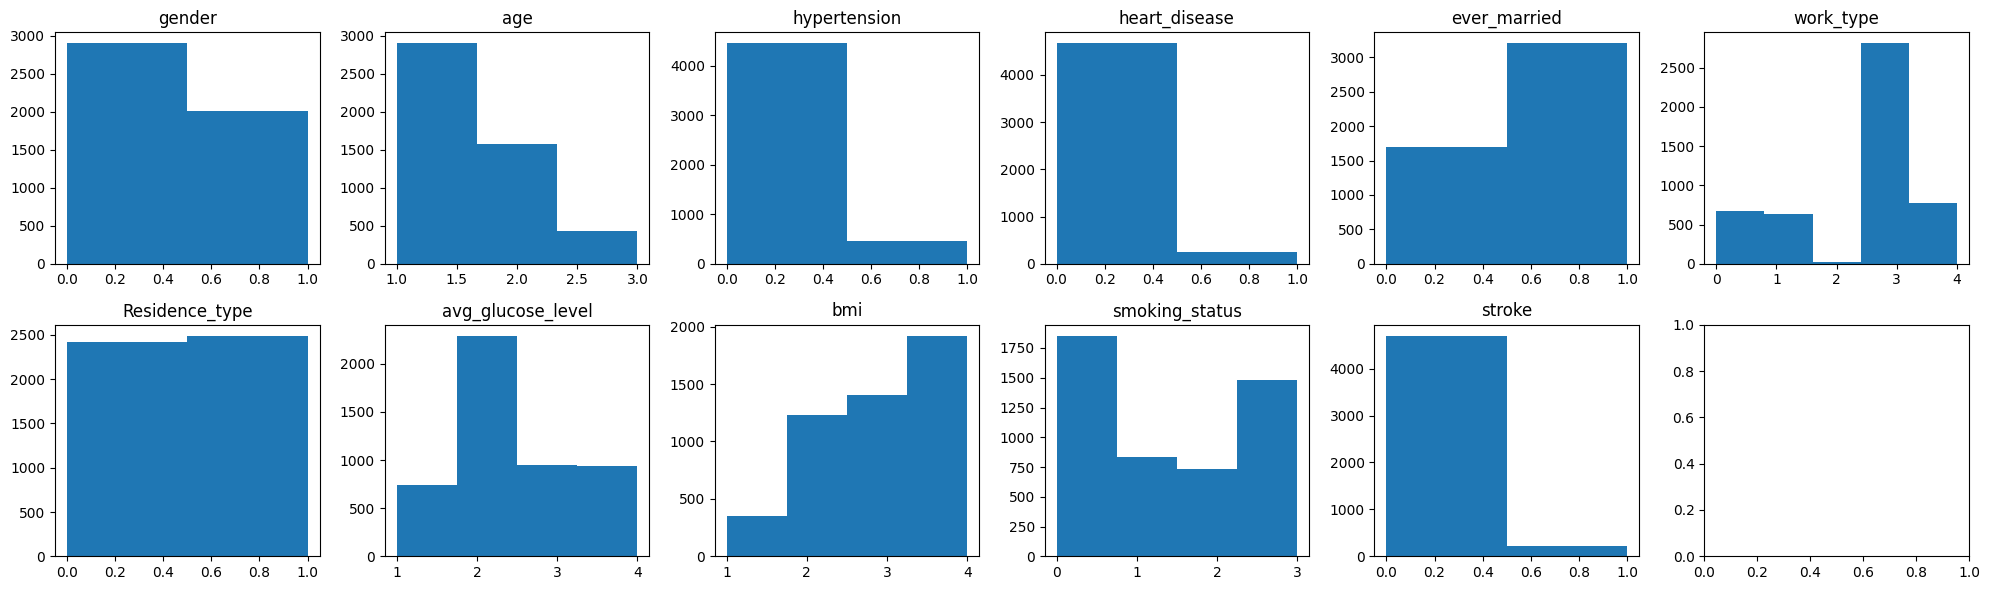

In [24]:
plot_hist(original_df, 2, 6, figsize = (20,6))

In [25]:
def corr_up_thershold(df,threshold):
    cond = (abs(df) > threshold) & (df != 1)  # Boolean condition to find values outside range
    result = df.where(cond)  # Return the corresponding values as a dataframe
    result = result.stack()  # Stack the dataframe to return column names as rows
    result = result.reset_index()  # Reset the index to separate column names
    result.columns = ['Index', 'Column', 'Value']  # Rename columns
    result = result[['Column', 'Value']]  # Select only 'Column' and 'Value' columns
    return result

In [26]:
def corr_plot(df,method):
    # corr_matrix_original = X.corr(method='spearman')  # method = spearman
    corr_matrix_original = df.corr(method=method)  # method = pearson
    # # Set figure size
    plt.figure(figsize=(10,10))


    # # Create heatmap
    sns.heatmap(corr_matrix_original, cmap="coolwarm", annot=True, fmt="0.2f")

    # # Show plot
    plt.show()

    return corr_matrix_original

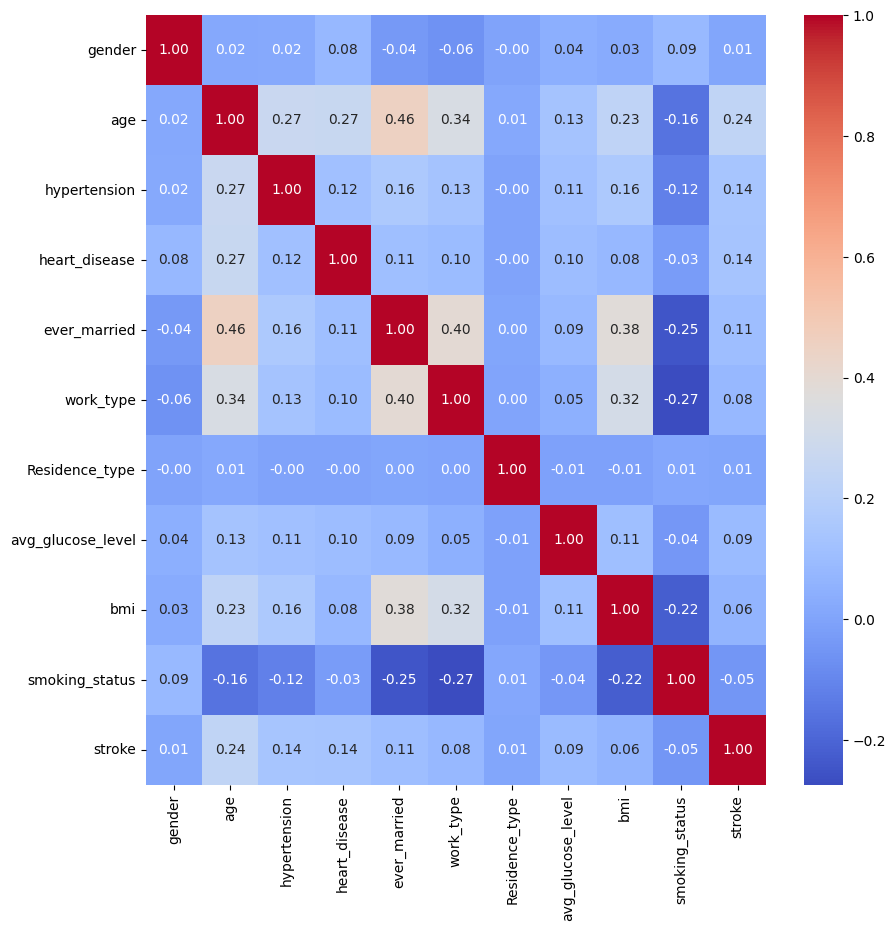

In [27]:
corr_matrix = corr_plot(original_df,'spearman')

Strong correlation ( ||correlation coeff|| > 0.4):

    age - marriage

In [28]:
corr_up_thershold(corr_matrix,0.4)

,Column,Value
0,ever_married,0.456581
1,age,0.456581


In [29]:
df = original_df.copy()
# df.drop(['age'], axis=1, inplace=True)# dropping age because it has high correlation with other variables
# df.drop(['heart_disease','hypertension'], axis=1, inplace=True)

# Data Augmentation

In [30]:
# from tensorflow.keras.optimizers import SGD
from sklearn.utils import compute_class_weight

In [31]:
class_weights = compute_class_weight(classes = original_df['stroke'].unique(), y = original_df['stroke'], class_weight='balanced')
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 11.741626794258373, 1: 0.5222387742072782}

Without Data augmentation, the class werghts were in 20.52 : 1 ratio which was very high, therefore model wasn't able to properly train. Thus it was overfitting for many architecture change or parameters change (tried and tested) 

In [32]:
from imblearn.over_sampling import SMOTE

# define the SMOTE oversampler
oversampler = SMOTE(random_state=42)

# fit and transform the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(df.drop('stroke', axis=1), df['stroke'])

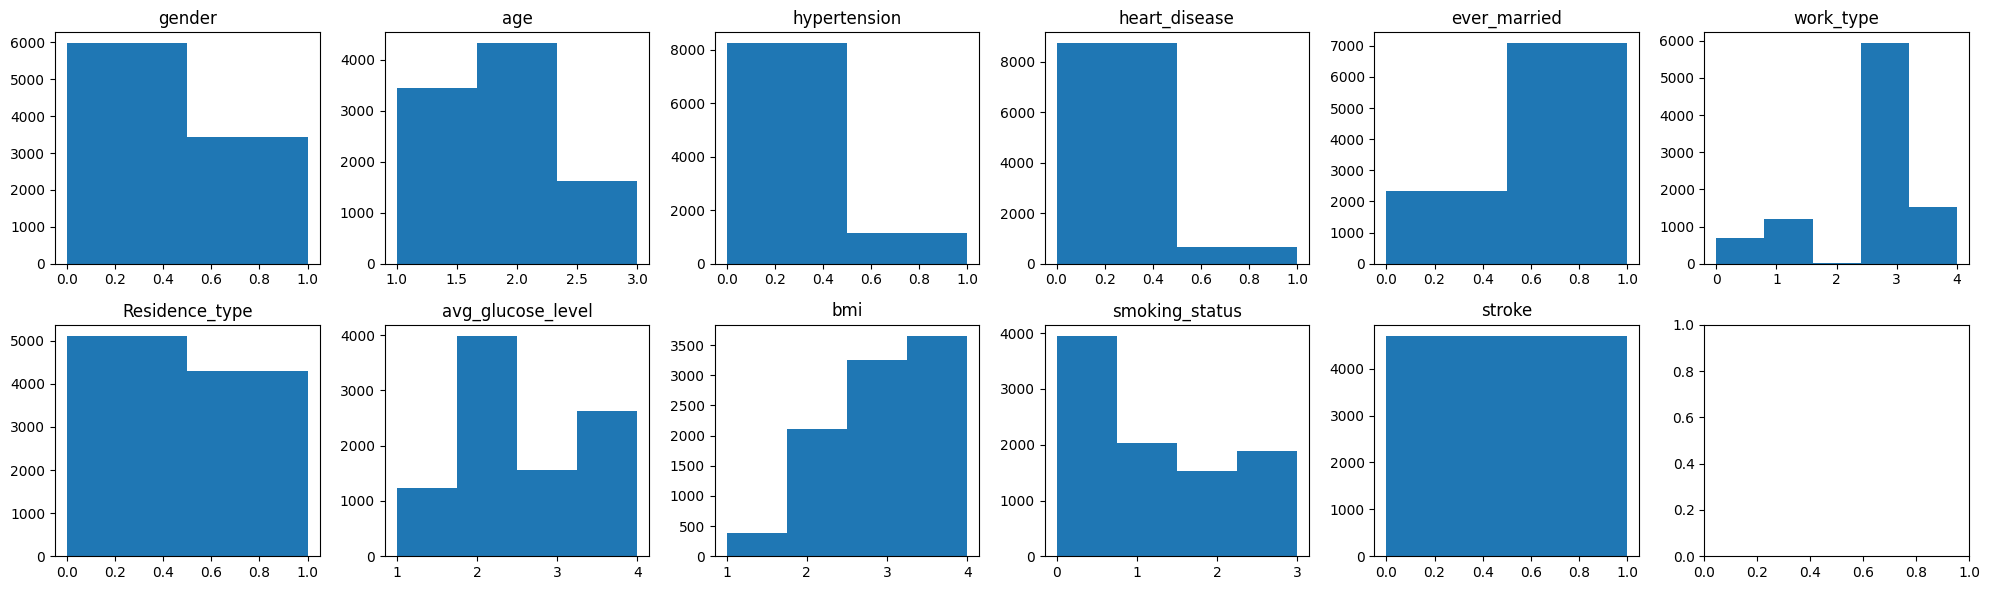

In [33]:
oversampled_df =pd.concat([X_train_oversampled,y_train_oversampled],axis = 1)
plot_hist(oversampled_df, 2, 6, figsize = (20,6))

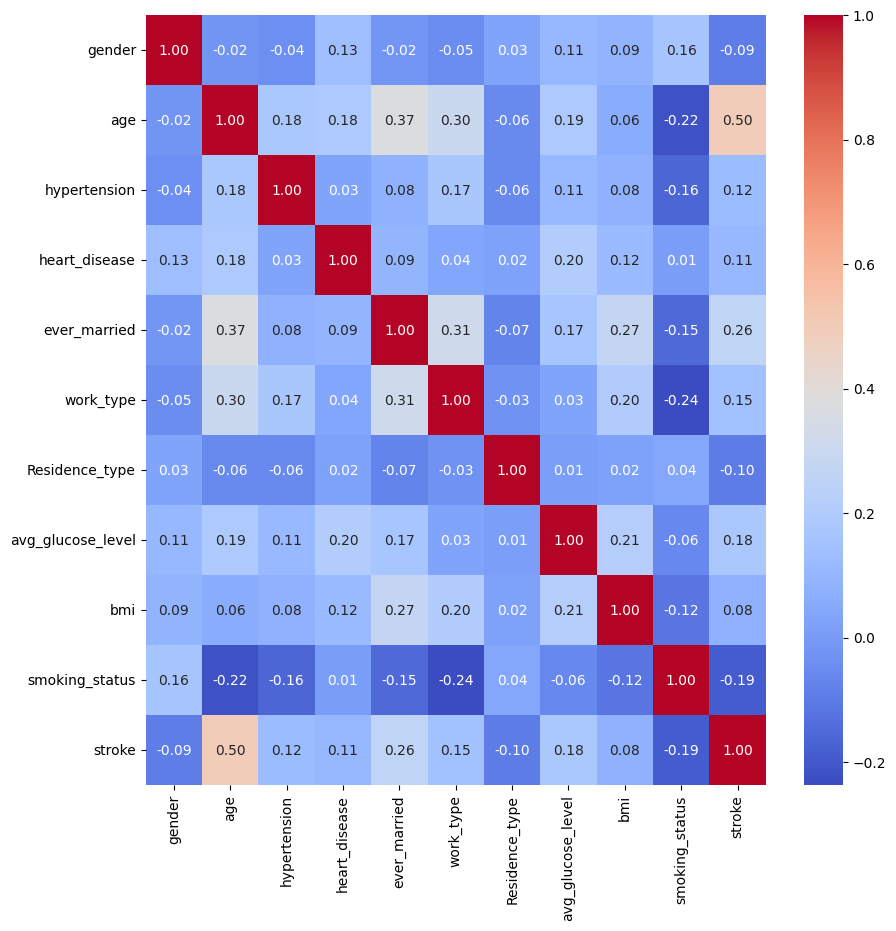

In [34]:
oversampled_corr_matrix = corr_plot(oversampled_df,'spearman')

In [35]:
corr_up_thershold(oversampled_corr_matrix,0.4)

,Column,Value
0,stroke,0.497933
1,age,0.497933


In [36]:
from sklearn.preprocessing import MinMaxScaler

# select columns to scale
cols_to_scale = oversampled_df.columns

# create scaler and apply to selected columns
scaler = MinMaxScaler()
oversampled_df[cols_to_scale] = scaler.fit_transform(oversampled_df[cols_to_scale])
oversampled_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.5,0.0,1.0,1.0,0.75,1.0,1.000000,1.000000,0.333333,1.0
1,1.0,1.0,0.0,1.0,1.0,0.75,0.0,0.666667,1.000000,0.000000,1.0
2,0.0,0.0,0.0,0.0,1.0,0.75,1.0,1.000000,1.000000,0.666667,1.0
3,0.0,1.0,1.0,0.0,1.0,1.00,0.0,1.000000,0.333333,0.000000,1.0
4,1.0,1.0,0.0,0.0,1.0,0.75,1.0,1.000000,0.666667,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9393,0.0,0.5,1.0,0.0,1.0,1.00,0.0,1.000000,0.666667,0.000000,1.0
9394,1.0,0.5,0.0,0.0,1.0,0.75,1.0,1.000000,1.000000,0.000000,1.0
9395,0.0,1.0,0.0,0.0,1.0,1.00,0.0,0.333333,1.000000,0.000000,1.0
9396,0.0,0.5,0.0,0.0,1.0,0.25,1.0,1.000000,0.666667,0.000000,1.0


In [37]:
# df = df.drop('id', axis=1)
X_train, X_test, y_train, y_test = train_test_split(oversampled_df.drop('stroke',axis=1), oversampled_df['stroke'], test_size=0.3, random_state=42)

In [38]:
X_train = X_train.sort_index().reset_index(drop=True)
X_test = X_test.sort_index().reset_index(drop=True)
y_train = y_train.sort_index().reset_index(drop=True)
y_test = y_test.sort_index().reset_index(drop=True)

# Defining the Model Architecture and appropriate loss function and metrices

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import glorot_uniform

In [62]:
model = Sequential()

model.add(Dense(50, input_dim=10,activation= 'relu')) 
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(30,activation= 'relu'))# HL 1
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(25,activation= 'relu'))# HL 2
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(20,activation = 'relu'))# HL 3
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(20,activation = 'relu'))# HL 4
# model.add(BatchNormalization())                 # Model 1       
# model.add(Dropout(0.2))                         # Model 1
model.add(Dense(10,activation = 'relu'))# HL 5
# model.add(BatchNormalization())                 # Model 1
# model.add(Dropout(0.2))                         # Model 1
model.add(Dense(1, activation='sigmoid')) #output layer with 1 neuron

model.compile(optimizer= 'adam', loss=['mean_squared_error','mse'], metrics=['accuracy'])
# model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                550       
                                                                 
 dense_22 (Dense)            (None, 30)                1530      
                                                                 
 dense_23 (Dense)            (None, 25)                775       
                                                                 
 dense_24 (Dense)            (None, 20)                520       
                                                                 
 dense_25 (Dense)            (None, 20)                420       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dense_27 (Dense)            (None, 1)                

# Training the model

#### Model 1 - using batch normalization & dropout at last 2 layers

In [60]:
history_1 = model.fit(X_train,y_train,validation_split=0.3,batch_size = 5,epochs = 70) ##using batch normalization and dropout at last 2 layers

Epoch 1/70
921/921 [==============================] - 3s 3ms/step - loss: 0.1070 - accuracy: 0.8588 - val_loss: 0.1766 - val_accuracy: 0.7933
Epoch 2/70
921/921 [==============================] - 3s 3ms/step - loss: 0.1081 - accuracy: 0.8564 - val_loss: 0.2042 - val_accuracy: 0.7548
Epoch 3/70
921/921 [==============================] - 3s 3ms/step - loss: 0.1070 - accuracy: 0.8595 - val_loss: 0.1512 - val_accuracy: 0.8414
Epoch 4/70
921/921 [==============================] - 3s 3ms/step - loss: 0.1112 - accuracy: 0.8540 - val_loss: 0.2143 - val_accuracy: 0.7624
Epoch 5/70
921/921 [==============================] - 3s 3ms/step - loss: 0.1084 - accuracy: 0.8612 - val_loss: 0.2110 - val_accuracy: 0.7356
Epoch 6/70
921/921 [==============================] - 2s 3ms/step - loss: 0.1144 - accuracy: 0.8462 - val_loss: 0.1840 - val_accuracy: 0.7670
Epoch 7/70
921/921 [==============================] - 2s 3ms/step - loss: 0.1109 - accuracy: 0.8514 - val_loss: 0.1793 - val_accuracy: 0.8212
Epoch 

#### Model 2 - without any batch normalization & dropout

In [41]:
history_2 = model.fit(X_train,y_train,validation_split=0.3,batch_size = 5,epochs = 50)

Epoch 1/50
921/921 [==============================] - 4s 3ms/step - loss: 0.1659 - accuracy: 0.7361 - val_loss: 0.3355 - val_accuracy: 0.6109
Epoch 2/50
921/921 [==============================] - 2s 2ms/step - loss: 0.1510 - accuracy: 0.7682 - val_loss: 0.3803 - val_accuracy: 0.3956
Epoch 3/50
921/921 [==============================] - 2s 2ms/step - loss: 0.1454 - accuracy: 0.7789 - val_loss: 0.3455 - val_accuracy: 0.4848
Epoch 4/50
921/921 [==============================] - 2s 3ms/step - loss: 0.1387 - accuracy: 0.7917 - val_loss: 0.2863 - val_accuracy: 0.5496
Epoch 5/50
921/921 [==============================] - 3s 3ms/step - loss: 0.1338 - accuracy: 0.7997 - val_loss: 0.3187 - val_accuracy: 0.5461
Epoch 6/50
921/921 [==============================] - 2s 2ms/step - loss: 0.1314 - accuracy: 0.8028 - val_loss: 0.2661 - val_accuracy: 0.6312
Epoch 7/50
921/921 [==============================] - 2s 2ms/step - loss: 0.1264 - accuracy: 0.8099 - val_loss: 0.2924 - val_accuracy: 0.5866
Epoch 

### Choosing the Model 2 as best model

# Getting the feature importances / weights

In [42]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Get the absolute values of the weights
importances = np.abs(weights)

# Normalize the importances
importances = importances / importances.sum(axis=0)

# Print the importances of each feature
for i, importance in enumerate(importances):
    print("Feature", i, "Importance", np.median(importance))


Feature 0 Importance 0.077219784
Feature 1 Importance 0.09374886
Feature 2 Importance 0.07189208
Feature 3 Importance 0.07714399
Feature 4 Importance 0.07384799
Feature 5 Importance 0.119984105
Feature 6 Importance 0.07480011
Feature 7 Importance 0.1145401
Feature 8 Importance 0.10228293
Feature 9 Importance 0.107371256


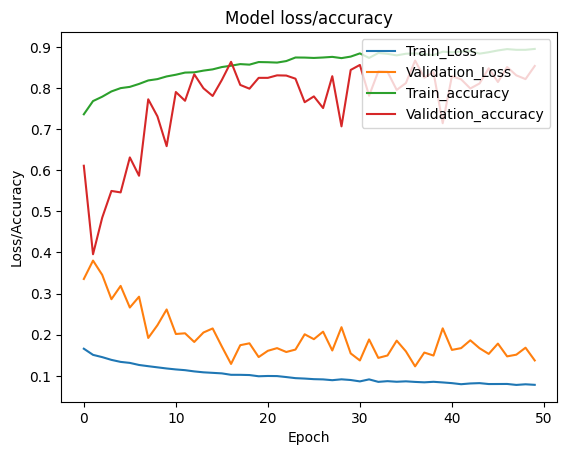

In [46]:
# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model loss/accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation_Loss','Train_accuracy', 'Validation_accuracy'], loc='upper right')
plt.show()

# # Plot training & validation accuracy values
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()

# Confusion matrix on testing data

In [44]:
from sklearn.metrics import confusion_matrix

89/89 [==============================] - 0s 1ms/step


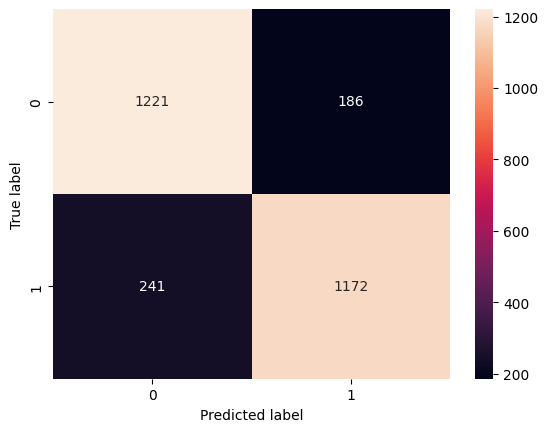

In [45]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5) #threshold - 0.5

# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)
# confusion_mtx = accuracy(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred_binary)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Model Metrics 

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_true= y_test,y_pred=y_pred_binary,target_names=['No Stroke','Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.84      0.87      0.85      1407
      Stroke       0.86      0.83      0.85      1413

    accuracy                           0.85      2820
   macro avg       0.85      0.85      0.85      2820
weighted avg       0.85      0.85      0.85      2820

